In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1010, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<br>
<br>

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

In [6]:
import numpy as np
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

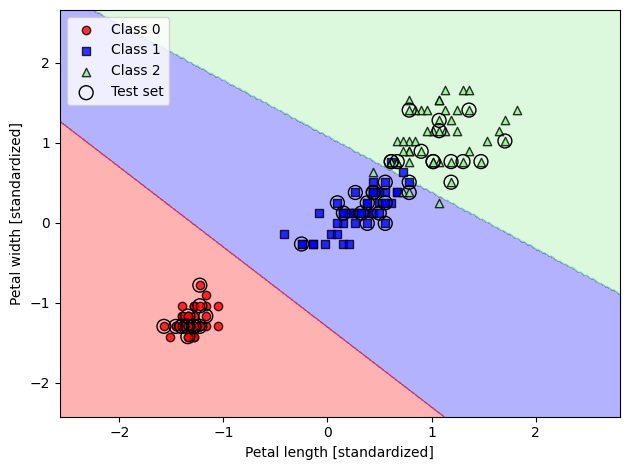

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1010)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

In [8]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')

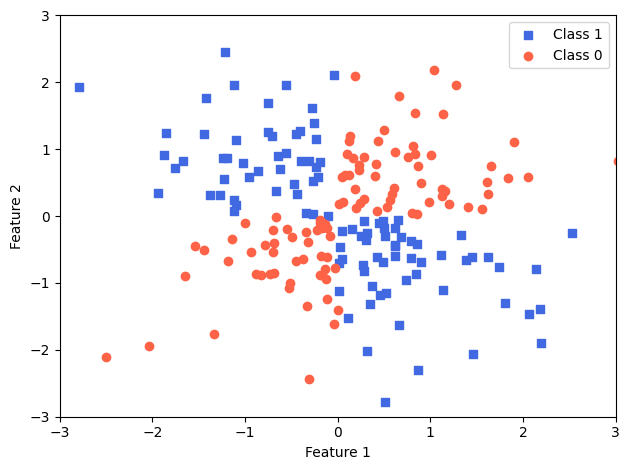

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

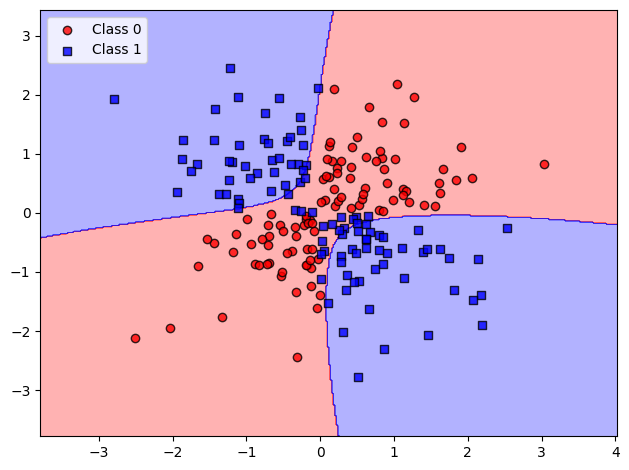

In [10]:
svm = SVC(kernel='rbf', random_state=1010, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

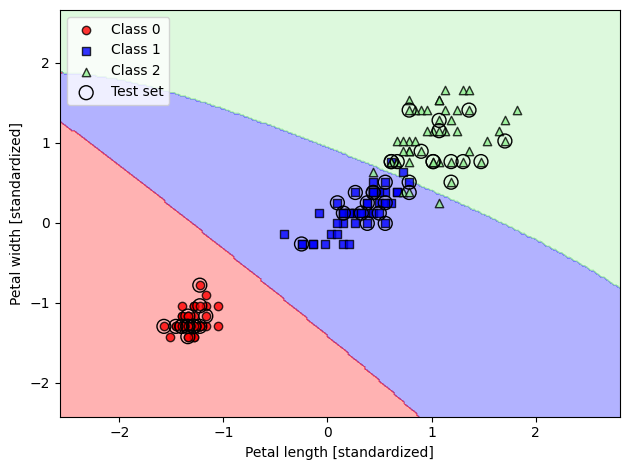

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1010, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show()

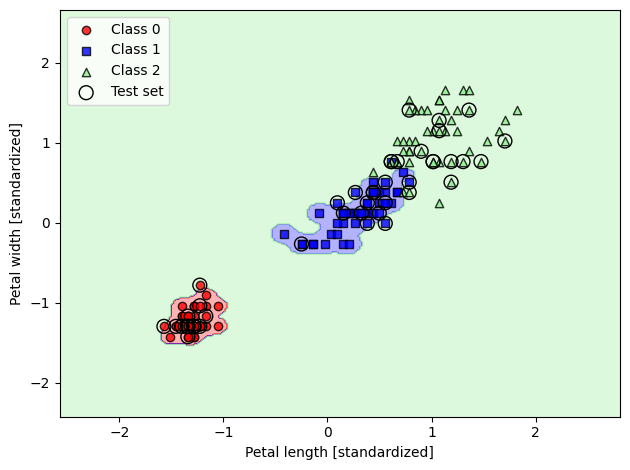

In [12]:
svm = SVC(kernel='rbf', random_state=1010, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

### SVM on Ton IoT Dataset

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML Lab/LAB_ToN_IoT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133794 entries, 0 to 133793
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         133794 non-null  int64  
 1   Flow ID            133794 non-null  object 
 2   Src IP             133794 non-null  object 
 3   Src Port           133794 non-null  int64  
 4   Dst IP             133794 non-null  object 
 5   Dst Port           133794 non-null  int64  
 6   Protocol           133794 non-null  int64  
 7   Timestamp          133794 non-null  object 
 8   Flow Duration      133794 non-null  int64  
 9   Tot Fwd Pkts       133794 non-null  int64  
 10  Tot Bwd Pkts       133794 non-null  int64  
 11  TotLen Fwd Pkts    133794 non-null  float64
 12  TotLen Bwd Pkts    133794 non-null  float64
 13  Fwd Pkt Len Max    133794 non-null  float64
 14  Fwd Pkt Len Min    133794 non-null  float64
 15  Fwd Pkt Len Mean   133794 non-null  float64
 16  Fw

In [15]:
df["Attack"].unique()

array(['Benign', 'backdoor', 'ddos', 'dos', 'injection', 'mitm',
       'password', 'ransomware', 'scanning', 'xss'], dtype=object)

In [16]:
df["Label"].unique()

array([0, 1])

In [17]:
columns_to_remove=['Unnamed: 0',
                   'Flow ID',
                   'Src IP',
                   'Src Port',
                   'Dst IP',
                   'Dst Port',
                   'Subflow Bwd Pkts',
                  'Fwd Byts/b Avg',
                  'Fwd Pkts/b Avg',
                  'Fwd Blk Rate Avg',
                  'ECE Flag Cnt',
                  'CWE Flag Count',
                  'URG Flag Cnt',
                  'Fwd PSH Flags',
                  'Bwd PSH Flags',
                  'Fwd URG Flags',
                  'Bwd URG Flags',
                  'Timestamp',]
df.drop(columns=columns_to_remove,inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

,0
Protocol,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
...,...
Idle Std,0
Idle Max,0
Idle Min,0
Label,0


In [19]:
df.dropna(inplace=True)
df.shape

(133794, 68)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = pd.get_dummies(df,columns=["Protocol"],drop_first=True)
df_encoded["Attack"] = le.fit_transform(df_encoded["Attack"])
df_encoded["Label"] = le.fit_transform(df_encoded["Label"])

In [21]:
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded.fillna(df_encoded.mean(), inplace=True)

### Binary Classification with Label

In [22]:
X = df_encoded.drop(columns=["Attack","Label"])
Y = df_encoded["Label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1010, stratify=Y)

In [23]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (93655, 67)
Shape of X_test: (40139, 67)
Shape of y_train: (93655,)
Shape of y_test: (40139,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [25]:
from cuml.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', random_state=1010, gamma=0.2, C=1.0)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

SVM Accuracy: 0.9775


In [26]:
C = [0.1,1,10,100]
gamma = [0.001,0.01,0.1,1]
for c in C:
  for g in gamma:
    svm = SVC(kernel='rbf', random_state=1010, gamma=g, C=c)
    svm.fit(X_train_scaled, y_train)

    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy for C={c} and gamma={g}: {accuracy:.4f}")

SVM Accuracy for C=0.1 and gamma=0.001: 0.8634
SVM Accuracy for C=0.1 and gamma=0.01: 0.9173
SVM Accuracy for C=0.1 and gamma=0.1: 0.9542
SVM Accuracy for C=0.1 and gamma=1: 0.9593
SVM Accuracy for C=1 and gamma=0.001: 0.9091
SVM Accuracy for C=1 and gamma=0.01: 0.9239
SVM Accuracy for C=1 and gamma=0.1: 0.9644
SVM Accuracy for C=1 and gamma=1: 0.9790
SVM Accuracy for C=10 and gamma=0.001: 0.9193
SVM Accuracy for C=10 and gamma=0.01: 0.9602
SVM Accuracy for C=10 and gamma=0.1: 0.9798
SVM Accuracy for C=10 and gamma=1: 0.9810
SVM Accuracy for C=100 and gamma=0.001: 0.9281
SVM Accuracy for C=100 and gamma=0.01: 0.9698
SVM Accuracy for C=100 and gamma=0.1: 0.9839
SVM Accuracy for C=100 and gamma=1: 0.9818


### Multi Class Classification with Attack

In [27]:
X = df_encoded.drop(columns=["Attack"])
Y = df_encoded["Attack"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1010, stratify=Y)

In [28]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (93655, 68)
Shape of X_test: (40139, 68)
Shape of y_train: (93655,)
Shape of y_test: (40139,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [30]:
from cuml.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', random_state=1010, gamma=0.2, C=1.0)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

SVM Accuracy: 0.8745


In [31]:
C = [0.1,1,10,100]
gamma = [0.001,0.01,0.1,1]
for c in C:
  for g in gamma:
    svm = SVC(kernel='rbf', random_state=1010, gamma=g, C=c)
    svm.fit(X_train_scaled, y_train)

    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy for C={c} and gamma={g}: {accuracy:.4f}")

SVM Accuracy for C=0.1 and gamma=0.001: 0.8752
SVM Accuracy for C=0.1 and gamma=0.01: 0.8746
SVM Accuracy for C=0.1 and gamma=0.1: 0.8730
SVM Accuracy for C=0.1 and gamma=1: 0.8658
SVM Accuracy for C=1 and gamma=0.001: 0.8754
SVM Accuracy for C=1 and gamma=0.01: 0.8757
SVM Accuracy for C=1 and gamma=0.1: 0.8756
SVM Accuracy for C=1 and gamma=1: 0.8721
SVM Accuracy for C=10 and gamma=0.001: 0.8760
SVM Accuracy for C=10 and gamma=0.01: 0.8763
SVM Accuracy for C=10 and gamma=0.1: 0.8748
SVM Accuracy for C=10 and gamma=1: 0.8710
SVM Accuracy for C=100 and gamma=0.001: 0.8765
SVM Accuracy for C=100 and gamma=0.01: 0.8763
SVM Accuracy for C=100 and gamma=0.1: 0.8739
SVM Accuracy for C=100 and gamma=1: 0.8687


# Summary

#### Binary Classifciation
 - Accuracy improves as C and gamma increase, showing that more complex decision boundaries fit the data better.
- Best performance: C=100, gamma=0.1 → Accuracy = 0.9839.
- Even lower values of C and gamma (e.g., C=0.1, gamma=0.001) still achieve decent accuracy (~0.86), but much lower than tuned values.

#### Multi Class Classification

 - Accuracy is relatively stable across different values of C and gamma, ranging narrowly between 0.865–0.876.

 - Best performance: C=100, gamma=0.001 → Accuracy = 0.8765, only slightly higher than default.

#### Conclusion
 - For binary classification, higher C and moderately high gamma give the best accuracy.
 - For multi-class classification, hyperparameter tuning has minimal impact; performance is fairly consistent.

